In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import pickle as pkl
import os
from einops import rearrange

In [32]:
def plot_kde(matrix, label, row_i, col_i):
    data = matrix[:, row_i, col_i, :]
    pca = PCA(n_components=2, random_state=42)
    reduced_data = pca.fit_transform(data)
    label_map = {1: "Truthful", 0: "False"}
    mapped_labels = [label_map[label] for label in label]

    df = pd.DataFrame({'PC1': reduced_data[:, 0], 'PC2': reduced_data[:, 1], 'Label': mapped_labels})

    g = sns.jointplot(data=df, x="PC1", y="PC2", hue="Label", kind="kde", fill=False)

    # Adjust the plot titles and labels
    g.set_axis_labels(f'Projection on the 1st Truthful Direction', f'Projection on the 2nd Truthful Direction')
    g.fig.suptitle(f'Kernel Density Estimate for Layer {row_i}, Head {col_i}')
    plt.show()

    # sns.kdeplot(data=df, x='PC1', y='PC2', hue='Label', fill=False, cmap='viridis', levels=10)
    # plt.title(f'Kernel Density Estimate layer {row_i} head {col_i}')
    # plt.show()

In [4]:
num_heads = 32

mc2_head_wise = pkl.load(open('/data/jxf/activations/llama_7B_tqa_mc2_stimulus_6_head_wise.pkl', 'rb'))
mc2_head_wise = np.array(mc2_head_wise)
mc2_head_wise = rearrange(mc2_head_wise, 'b l (h d) -> b l h d', h = num_heads)
mc2_labels = np.load('/data/jxf/activations/llama_7B_tqa_mc2_stimulus_6_labels.npy')

In [37]:
mc2_head_wise.shape

(5882, 32, 32, 128)

In [1]:
plot_kde(mc2_head_wise, mc2_labels, 11, 6)

NameError: name 'plot_kde' is not defined

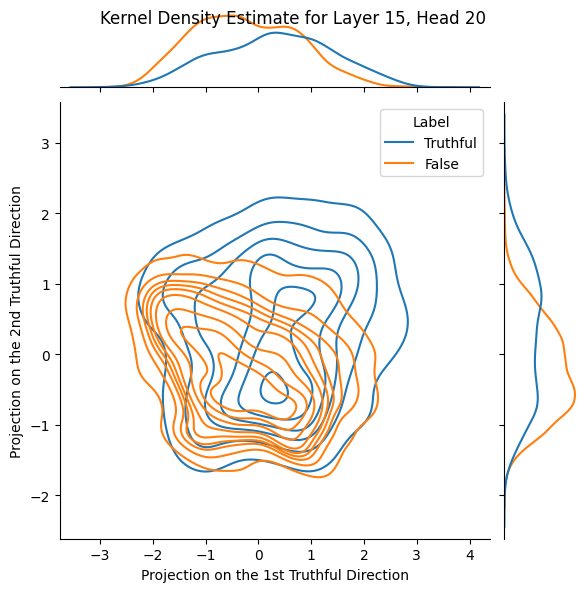

In [34]:
plot_kde(mc2_head_wise, mc2_labels, 15, 20)